In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

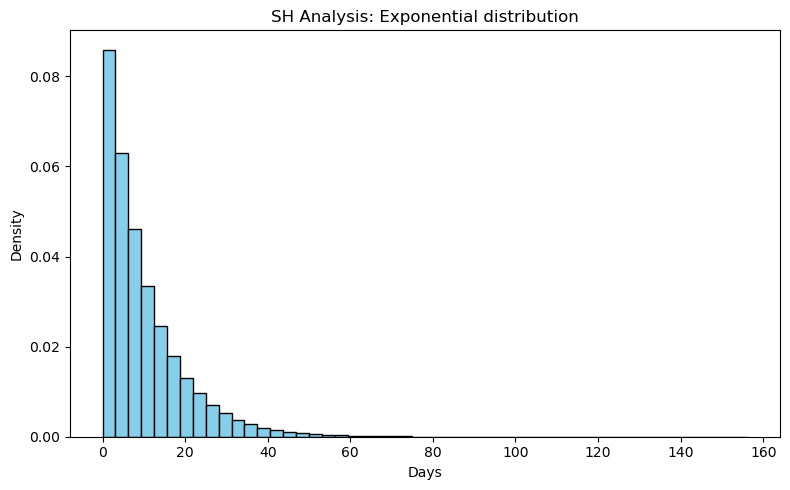

In [36]:
from scipy.stats import expon

mean_days = 10
scale = mean_days        

samples = expon.rvs(scale=scale, size=1000000)

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=50, density=True, color="skyblue", edgecolor="black")
plt.title("SH Analysis: Exponential distribution")
plt.xlabel("Days")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


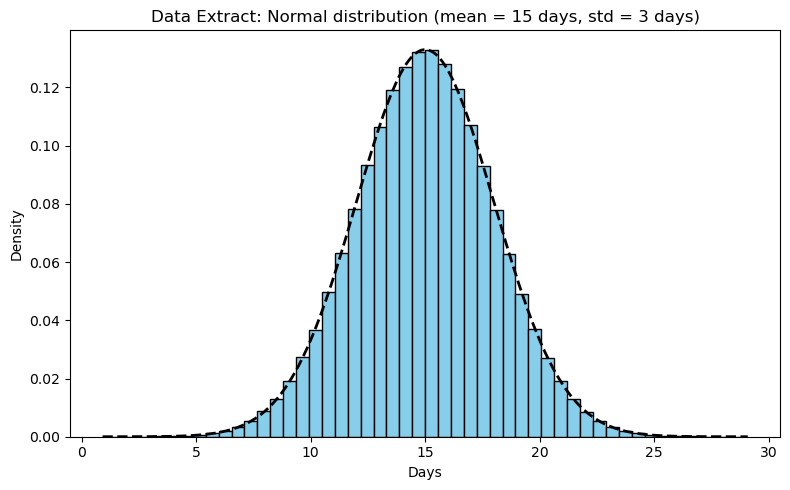

In [37]:
from scipy.stats import norm

mean_days = 15
std_days = 3

samples = norm.rvs(loc=mean_days, scale=std_days, size=1000000)

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=50, density=True, color="skyblue", edgecolor="black")

x = np.linspace(samples.min(), samples.max(), 300)
plt.plot(x, norm.pdf(x, loc=mean_days, scale=std_days), "k--", linewidth=2)

plt.title("Data Extract: Normal distribution (mean = 15 days, std = 3 days)")
plt.xlabel("Days")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

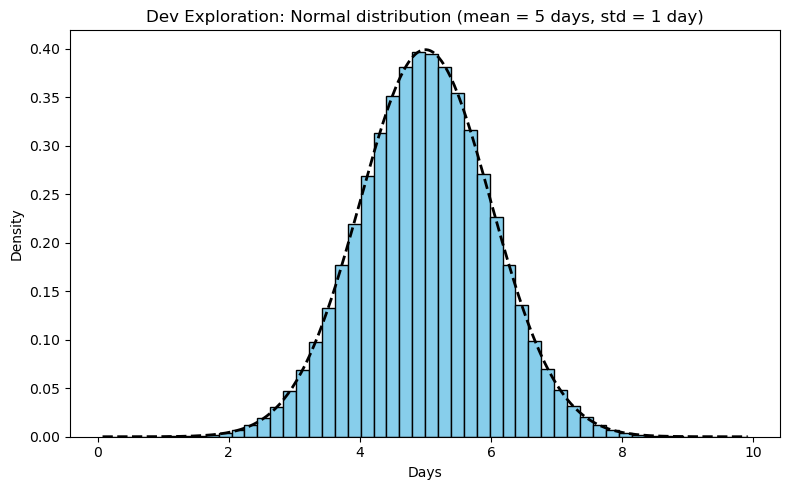

In [38]:
from scipy.stats import norm

mean_days = 5
std_days = 1

samples = norm.rvs(loc=mean_days, scale=std_days, size=1000000)

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=50, density=True, color="skyblue", edgecolor="black")

x = np.linspace(samples.min(), samples.max(), 300)
plt.plot(x, norm.pdf(x, loc=mean_days, scale=std_days), "k--", linewidth=2)

plt.title("Dev Exploration: Normal distribution (mean = 5 days, std = 1 day)")
plt.xlabel("Days")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

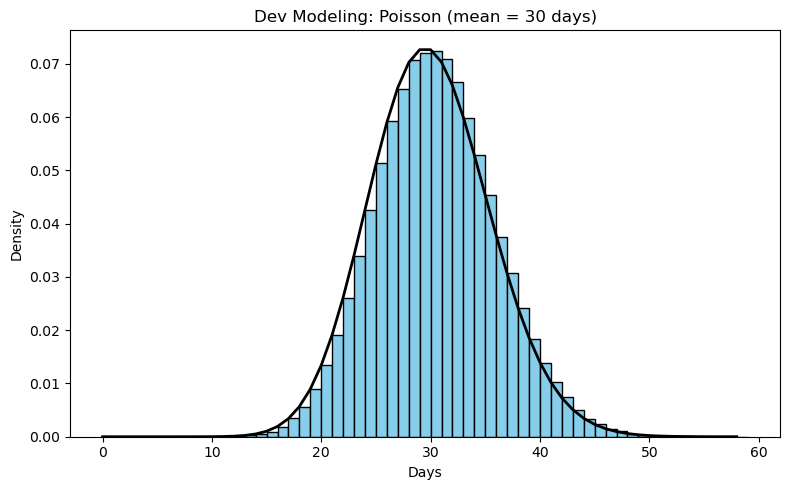

In [39]:
from scipy.stats import poisson

samples = poisson.rvs(30, size = 1000000)


plt.figure(figsize=(8, 5))

plt.hist(
    samples,
    bins=range(0, samples.max() + 2),
    density=True,
    color="skyblue", edgecolor="black"
)

x = np.arange(0, samples.max() + 1)
plt.plot(x, poisson.pmf(x, mu=30), "k-", linewidth=2)


plt.title("Dev Modeling: Poisson (mean = 30 days)")
plt.xlabel("Days")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


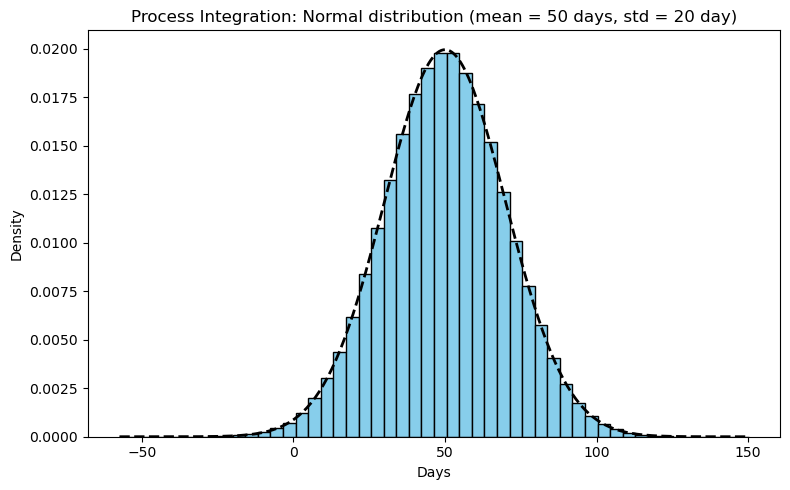

In [40]:
from scipy.stats import norm

mean_days = 50
std_days = 20

samples = norm.rvs(loc=mean_days, scale=std_days, size=1000000)

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=50, density=True, color="skyblue", edgecolor="black")

x = np.linspace(samples.min(), samples.max(), 300)
plt.plot(x, norm.pdf(x, loc=mean_days, scale=std_days), "k--", linewidth=2)

plt.title("Process Integration: Normal distribution (mean = 50 days, std = 20 day)")
plt.xlabel("Days")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

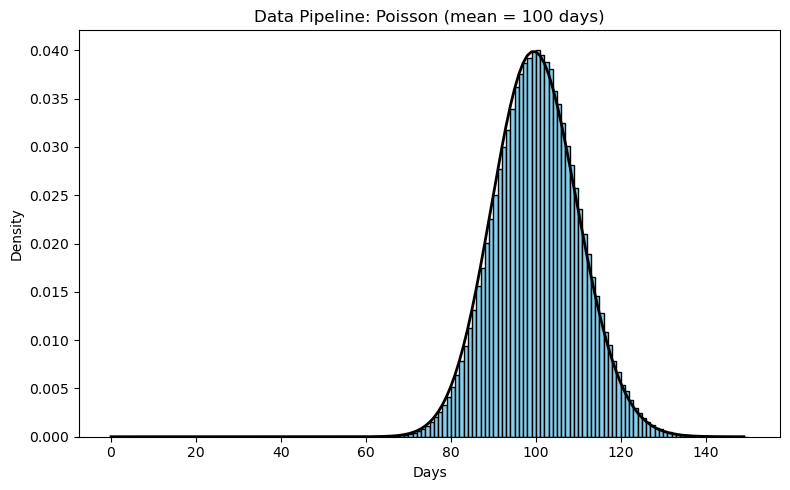

In [41]:
from scipy.stats import poisson

samples = poisson.rvs(100, size = 1000000)


plt.figure(figsize=(8, 5))

plt.hist(
    samples,
    bins=range(0, samples.max() + 2),
    density=True,
    color="skyblue", edgecolor="black"
)

x = np.arange(0, samples.max() + 1)
plt.plot(x, poisson.pmf(x, mu=100), "k-", linewidth=2)


plt.title("Data Pipeline: Poisson (mean = 100 days)")
plt.xlabel("Days")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


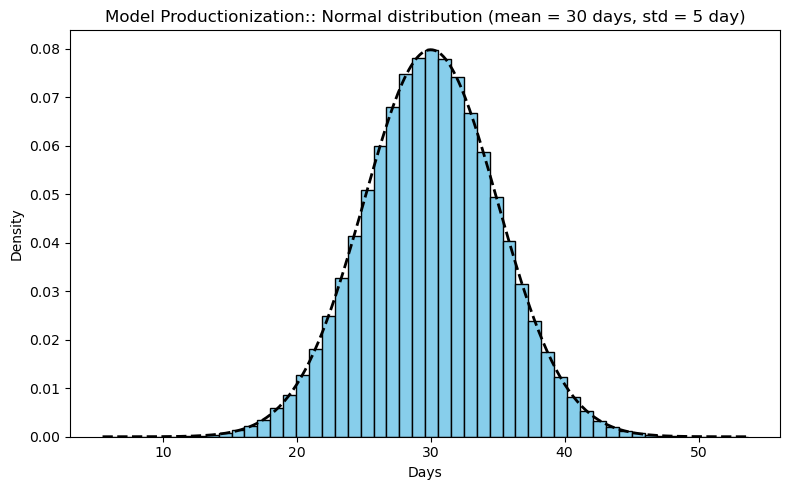

In [42]:
from scipy.stats import norm

mean_days = 30
std_days = 5

samples = norm.rvs(loc=mean_days, scale=std_days, size=1000000)

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=50, density=True, color="skyblue", edgecolor="black")

x = np.linspace(samples.min(), samples.max(), 300)
plt.plot(x, norm.pdf(x, loc=mean_days, scale=std_days), "k--", linewidth=2)

plt.title("Model Productionization:: Normal distribution (mean = 30 days, std = 5 day)")
plt.xlabel("Days")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [43]:
n_sim = 1000000

sh = expon.rvs(scale=10, size=n_sim)
data = norm.rvs(loc=15, scale=3, size=n_sim)
dev = norm.rvs(loc=5, scale=1, size=n_sim)
dev_mod = poisson.rvs(mu=30, size=n_sim)
process = norm.rvs(loc=50, scale=20, size=n_sim)
data_pip = poisson.rvs(mu=100, size=n_sim)
model = norm.rvs(loc=30, scale=5, size=n_sim)


Total_time = sh + np.maximum(data + dev + dev_mod, data_pip) + model + process



print("Mean total days:", np.mean(Total_time))
print("Std total days:", np.std(Total_time, ddof=1))



Mean total days: 190.0174008987203
Std total days: 25.00317000887402


In [44]:
mean_time = Total_time.mean()
median_time = np.median(Total_time)
ci_lower, ci_upper = np.percentile(Total_time, [2.5, 97.5])

print(f"Mean total time: {mean_time:.2f} days")
print(f"Median total time: {median_time:.2f} days")
print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}] days")


Mean total time: 190.02 days
Median total time: 189.54 days
95% CI: [142.35, 240.56] days


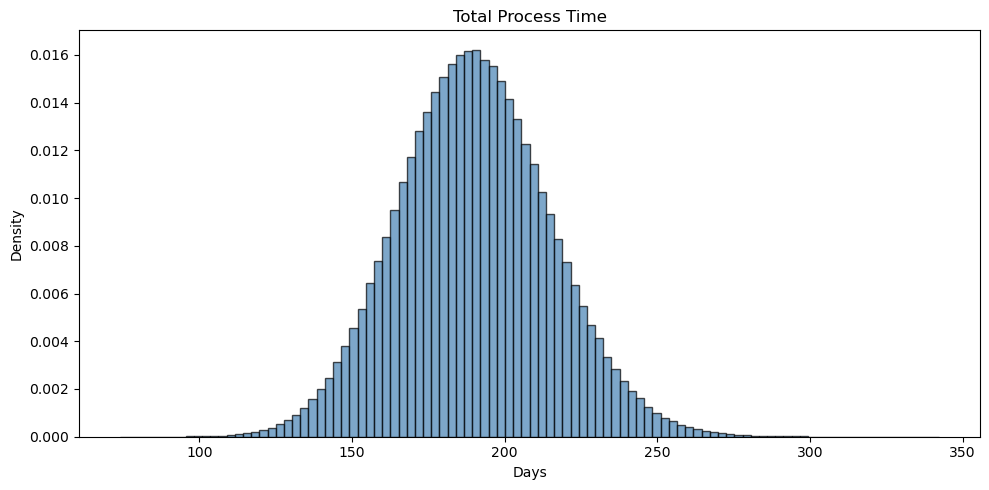

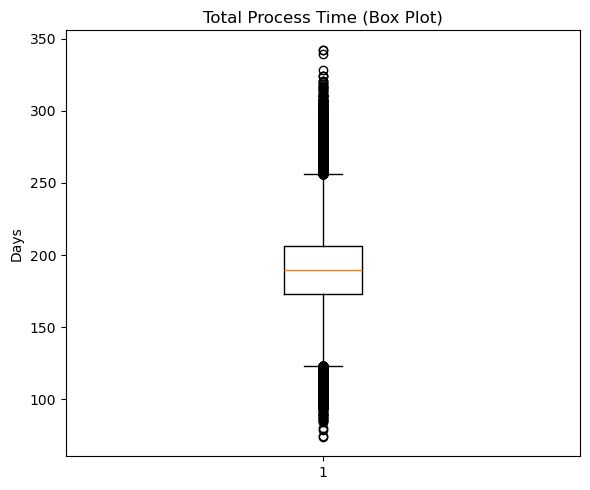

In [45]:
plt.figure(figsize=(10, 5))
plt.hist(
    Total_time,
    bins=100,
    density=True,
    alpha=0.7,
    color="steelblue",
    edgecolor="black"
)
plt.title("Total Process Time")
plt.xlabel("Days")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
plt.boxplot(Total_time, vert=True)
plt.title("Total Process Time (Box Plot)")
plt.ylabel("Days")
plt.tight_layout()
plt.show()

In [46]:
print("Mean Data Extract + Dev Exploration + Dev Modeling:", np.mean(data + dev + dev_mod))
print("Mean Prod Data Pipeline:", np.mean(data_pip))



Mean Data Extract + Dev Exploration + Dev Modeling: 49.995049534488984
Mean Prod Data Pipeline: 100.004745


In [47]:
print("Max Data Integration:", np.max(process))

Max Data Integration: 141.82339311064743


In [48]:
n_sim = 1000000

sh = expon.rvs(scale=10, size=n_sim)
data = norm.rvs(loc=15, scale=3, size=n_sim)
dev = norm.rvs(loc=5, scale=1, size=n_sim)
dev_mod = poisson.rvs(mu=30, size=n_sim)
process = norm.rvs(loc=50, scale=20, size=n_sim)
data_pip = poisson.rvs(mu=150, size=n_sim)
model = norm.rvs(loc=30, scale=5, size=n_sim)


Total_time_2 = sh + np.maximum(data + dev + dev_mod, data_pip) + model + process



delay = Total_time_2 - Total_time

mean_time = delay.mean()
median_time = np.median(delay)
ci_upper = np.percentile(delay, 97.5)

print(f"Mean total time: {mean_time:.2f} days")
print(f"Median total time: {median_time:.2f} days")
print(f"95% CI:  {ci_upper:.2f} days")

Mean total time: 50.01 days
Median total time: 50.00 days
95% CI:  120.73 days
